In [5]:
import sys
import sklearn
import matplotlib
import numpy as np

print('Python {}'.format(sys.version))
print('sklearn {}'.format(sklearn.__version__))
print('Python {}'.format(matplotlib.__version__))
print('Python {}'.format(np.__version__))

Python 3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]
sklearn 1.5.1
Python 3.7.1
Python 1.24.3


In [7]:
#loading dataset from keras data sets
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [9]:
print('Training Data: {}'.format(x_train.shape))
print('Training Labels: {}'.format(y_train.shape))

Training Data: (60000, 28, 28)
Training Labels: (60000,)


In [11]:
print('Testing Data: {}'.format(x_test.shape))
print('Testing Labels: {}'.format(y_test.shape))

Testing Data: (10000, 28, 28)
Testing Labels: (10000,)


In [13]:
import matplotlib.pyplot as plt
#python magic function
%matplotlib inline

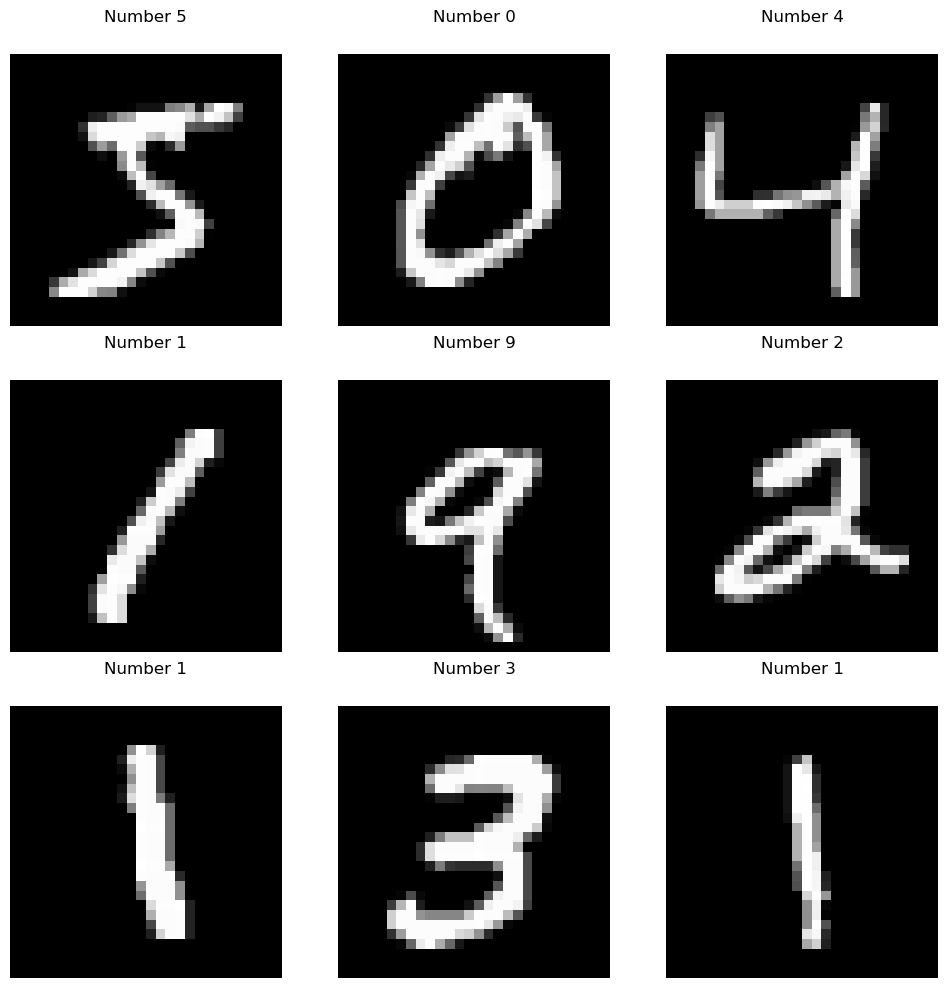

In [29]:
# create figure with 3 x 3 subplots using matplotlib.pyplot
fig, axs = plt.subplots(3, 3, figsize = (12, 12))
plt.gray()

#loop through subplots and add mnist images
for i, ax in enumerate(axs.flat):
    ax.matshow(x_train[i])
    ax.axis('off')
    ax.set_title('Number {}'.format(y_train[i]))

#display image
plt.show()

In [38]:
# preprocessing the images

# convert each image to 1 dimensional array
X = x_train.reshape(len(x_train), -1)
Y = y_train

#normalize the data to 0 -1 
X = X.astype(float) / 255.

print(X.shape)
print(X[0].shape)


(60000, 784)
(784,)


In [44]:
from sklearn.cluster import MiniBatchKMeans

n_digits = len(np.unique(y_test))
print(n_digits)

# initialize the KMeans model
kmeans = MiniBatchKMeans(n_clusters = n_digits)

# fit the model to the training data
kmeans.fit(X)

10


C:\Users\bruno\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1955: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


MiniBatchKMeans(n_clusters=10)

In [52]:
kmeans.labels_[:20]

array([6, 9, 1, 7, 1, 0, 5, 6, 5, 1, 3, 7, 3, 8, 5, 1, 0, 7, 2, 7])

In [62]:
def infer_cluster_labels(kmeans, actual_labels):
    """
    Associates most probable label with each cluster in KMeans model
    returns : dictionary of clusters assigned to each label
    """

    inferred_labels = {}

    for i in range(kmeans.n_clusters):

        # find the index of points in cluster
        labels = []
        index = np.where(kmeans.labels_ == i)

        # append actual labels for each point in cluster
        labels.append(actual_labels[index])

        # determine the most common label
        if len(labels[0] == 1):
            counts = np.bincount(labels[0])
        else:
            counts = np.bincount(np.squeeze(labels))

        # assign the cluster to a value in the inferred_labels dictionary
        if np.argmax(counts) in inferred_labels:
            # append the new number to the existing array at this key
            inferred_labels[np.argmax(counts)].append(i)
        else:
            #create a new array for this key
            inferred_labels[np.argmax(counts)] = [i]

    return inferred_labels

def infer_data_labels(X_labels, cluster_labels):
    """
    Determines label for each array, depending on the cluster it has been assigned to
    returns: predicted labels for each array
    """

    # empty array of len(X)
    predicted_labels = np.zeros(len(X_labels)).astype(np.uint8)

    for i, cluster in enumerate(X_labels):
        for key, value in cluster_labels.items():
            if cluster in value:
                predicted_labels[i] = key
                
    return predicted_labels

In [66]:
# test the infer_cluster_labels() and infer_data_labels
cluster_labels = infer_cluster_labels(kmeans, Y)
X_clusters = kmeans.predict(X)
predicted_labels = infer_data_labels(X_clusters, cluster_labels)

print(predicted_labels[:20])
print(Y[:20])


[8 0 7 1 7 2 1 8 1 7 3 1 3 6 1 7 2 1 9 1]
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]


In [72]:
# optimizing and evaluating the clustering algorithm

from sklearn import metrics

def calculate_metrics(estimater, data, labels):

    # calculate and print metrics
    print('Number of clusters: {}'.format(estimator.n_clusters))
    print('Inertia: {}'.format(estimator.inertia_))
    print('Homogeneity: {}'.format(metrics.homogeneity_score(labels, estimator.labels_)))

In [78]:
clusters = [10, 16, 36, 64, 144, 256, 400]

# test different numbers of clusters
for n_clusters in clusters:

    estimator = MiniBatchKMeans(n_clusters = n_clusters, batch_size=1536)
    estimator.fit(X)

    #print cluster metrics
    calculate_metrics(estimator, X, Y)

    # determine predicted labels
    cluster_labels = infer_cluster_labels(estimator, Y)
    predicted_Y = infer_data_labels(estimator.labels_, cluster_labels)

    # calculate and print the accuracy
    print('Accuracy: {}\n'.format(metrics.accuracy_score(Y, predicted_Y)))

Number of clusters: 10
Inertia: 2381789.7023875993
Homogeneity: 0.47261526450840796
Accuracy: 0.5566833333333333

Number of clusters: 16
Inertia: 2219962.0719692456
Homogeneity: 0.549892430016707
Accuracy: 0.6395

Number of clusters: 36
Inertia: 1962700.7055139956
Homogeneity: 0.6719214947623808
Accuracy: 0.7603666666666666

Number of clusters: 64
Inertia: 1807356.0449893186
Homogeneity: 0.7409787038691754
Accuracy: 0.8049666666666667

Number of clusters: 144
Inertia: 1624278.6219974295
Homogeneity: 0.8043848814901167
Accuracy: 0.86605

Number of clusters: 256
Inertia: 1503711.308126483
Homogeneity: 0.8430561823394367
Accuracy: 0.9026666666666666

Number of clusters: 400
Inertia: 1418458.9401008126
Homogeneity: 0.8680939955046764
Accuracy: 0.9167833333333333



In [84]:
# test kmeans algorithm on testing dataset
#convert each image to 1 dimensional array
X_test = x_test.reshape(len(x_test), -1)

#normalize the data to binary
X_test = X_test.astype(float) / 255.

# initialize and fit kmeans algorithm on training data
kmeans = MiniBatchKMeans(n_clusters = 256, batch_size=1536)
kmeans.fit(X)
cluster_labels = infer_cluster_labels(kmeans, Y)

#predict the labels for testing data
test_clusters = kmeans.predict(X_test)
predicted_labels = infer_data_labels(test_clusters, cluster_labels)

#calculate and print accuracy
print('Testing Accuracy: {}'.format(metrics.accuracy_score(y_test,predicted_labels)))



Testing Accuracy: 0.9026


C:\Users\bruno\AppData\Local\Temp\ipykernel_19556\1001528895.py:35: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


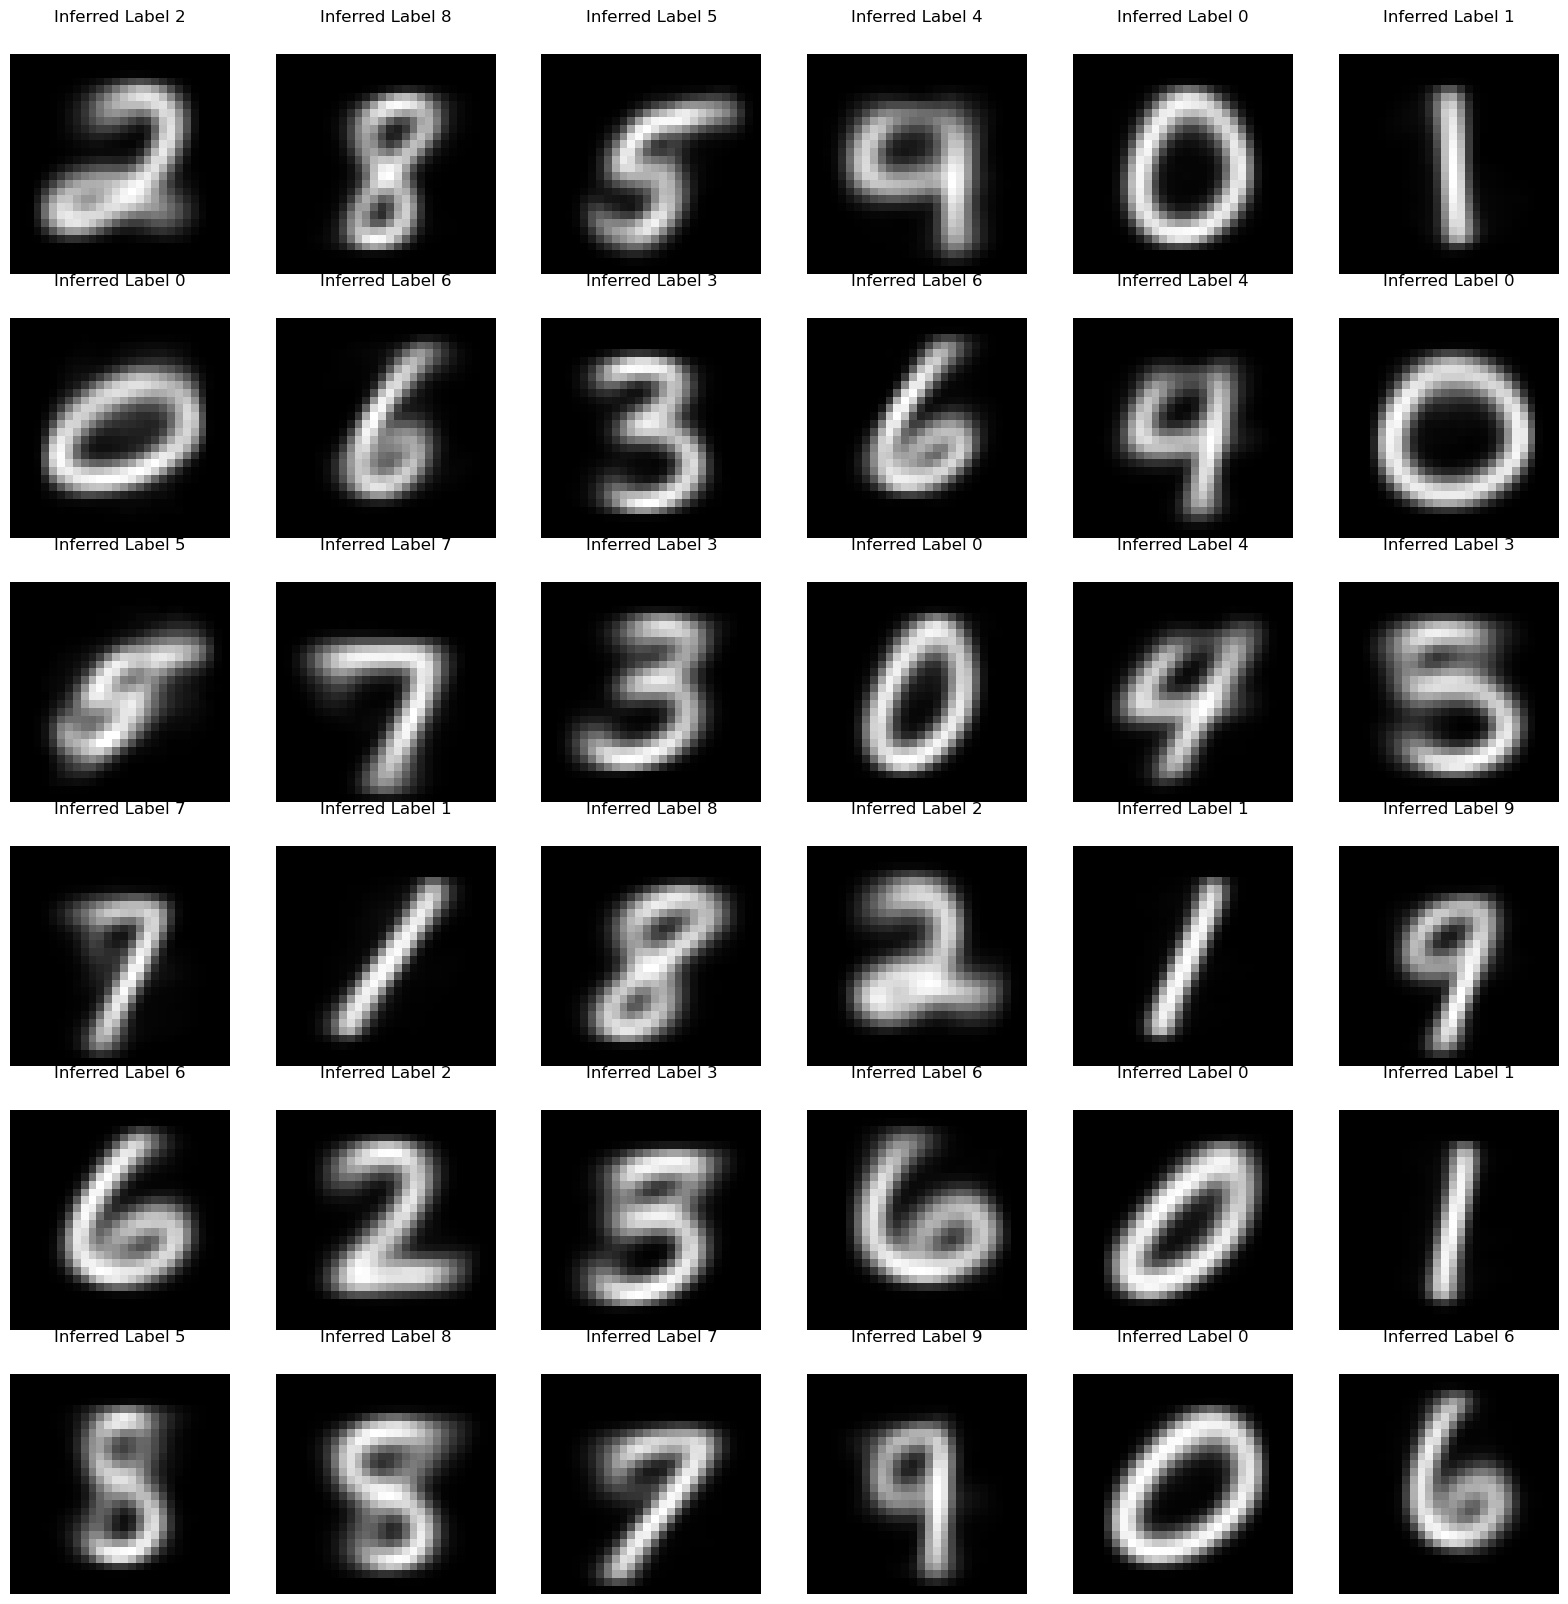

In [92]:
#visualize cluster centroids

# initialize and fit KMeans algorithm
kmeans = MiniBatchKMeans(n_clusters = 36, batch_size=1536)
kmeans.fit(X)

# record centroid values
centroids = kmeans.cluster_centers_

# reshape centroids into images 
images = centroids.reshape(36, 28, 28)
images *= 255
images = images.astype(np.uint8)

# determine cluster labels
cluster_labels = infer_cluster_labels(kmeans, Y)

# create a figure with subplots using matplotlib.pyploy

fig, axs = plt.subplots(6,6, figsize = (20, 20))
plt.gray()

# loop through subplots and add centroid images
for i, ax in enumerate(axs.flat):
    
    #determine inferred labels using cluster_labels dictionary
    for key, value in cluster_labels.items():
        if i in value:
            ax.set_title('Inferred Label {}'.format(key))
    # add image to subplot
    ax.matshow(images[i])
    ax.axis('off')

#displlay the figure
fig.show()
